Importing libraries and dataset

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Df=pd.read_csv(r'/content/seattle-weather.csv')
Df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


Statistical information of Dataset

In [3]:
Df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [4]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [5]:
Df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

Missing Values

In [83]:
Df.set_index ('date',inplace=True)
Df

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,rain
2015-12-28,1.5,5.0,1.7,1.3,rain
2015-12-29,0.0,7.2,0.6,2.6,fog


In [7]:
Df.head(10)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
2012-01-06,2.5,4.4,2.2,2.2,rain
2012-01-07,0.0,7.2,2.8,2.3,rain
2012-01-08,0.0,10.0,2.8,2.0,sun
2012-01-09,4.3,9.4,5.0,3.4,rain


In [8]:
Df.isna ().sum ()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [9]:
Df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [21]:
Df ['weather'].replace({'rain':'1','drizzle':'2','fog':'3','snow':'4','sun':'0'})

0       2
1       1
2       1
3       1
4       1
       ..
1456    1
1457    1
1458    3
1459    0
1460    0
Name: weather, Length: 1461, dtype: object

In [22]:
Df.set_index ('weather',inplace=True)
Df

,date,precipitation,temp_max,temp_min,wind
weather,,,,,
drizzle,2012-01-01,0.0,12.8,5.0,4.7
rain,2012-01-02,10.9,10.6,2.8,4.5
rain,2012-01-03,0.8,11.7,7.2,2.3
rain,2012-01-04,20.3,12.2,5.6,4.7
rain,2012-01-05,1.3,8.9,2.8,6.1
...,...,...,...,...,...
rain,2015-12-27,8.6,4.4,1.7,2.9
rain,2015-12-28,1.5,5.0,1.7,1.3
fog,2015-12-29,0.0,7.2,0.6,2.6


Parametric Statistical calculations

In [23]:
Df.mean ()

<ipython-input-23-eb745b953baf>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Df.mean ()


precipitation     3.029432
temp_max         16.439083
temp_min          8.234771
wind              3.241136
dtype: float64

In [24]:
Df.median ()

<ipython-input-24-ca1155bf47ee>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Df.median ()


precipitation     0.0
temp_max         15.6
temp_min          8.3
wind              3.0
dtype: float64

In [26]:
#standard deviation
Std_dev=np.std (Df)
Std_dev

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3613: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


precipitation    6.677908
temp_max         7.347242
temp_min         5.021285
wind             1.437333
dtype: float64

Variance

In [27]:
Variance=np.var (Df)
Variance

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3755: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


precipitation    44.594452
temp_max         53.981970
temp_min         25.213302
wind              2.065926
dtype: float64

Dataset range

In [28]:
Data_range=np.max (Df['precipitation'])-np.min(Df['precipitation'])
Data_range

55.9

In [29]:
Data_range=np.max (Df['wind'])-np.min(Df['wind'])
Data_range

9.1

In [30]:
Data_range=np.max (Df['temp_max'])-np.min(Df['temp_max'])
Data_range

37.2

In [31]:
Data_range=np.max (Df['temp_min'])-np.min(Df['temp_min'])
Data_range

25.4

Standard errors

In [32]:
Std_err =Df.sem ()
Std_err

<ipython-input-32-4cad8f9ce882>:1: FutureWarning: The default value of numeric_only in DataFrame.sem is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Std_err =Df.sem ()


precipitation    0.174769
temp_max         0.192286
temp_min         0.131413
wind             0.037617
dtype: float64

NORMALITY TEST

1.skewness

In [33]:

from scipy.stats import skew

Skewness=skew (Df ['precipitation'])
Skewness

3.502043466505449

In [34]:
Skewness =skew (Df ['wind'])
Skewness

0.8907517881858251

In [35]:
Skewness =skew (Df ['temp_max'])
Skewness

0.2806414809439689

In [36]:
Skewness =skew (Df ['temp_min'])
Skewness

-0.24920236092580825

2.Kurtosis

In [38]:
from scipy.stats import kurtosis

Kurtosis =kurtosis(Df ['precipitation'])
Kurtosis

15.465003489603738

In [39]:
Kurtosis =kurtosis(Df ['wind'])
Kurtosis

0.7971080290971506

In [40]:
Kurtosis =kurtosis(Df ['temp_max'])
Kurtosis

-0.6922102687719676

In [41]:
Kurtosis =kurtosis(Df ['temp_min'])
Kurtosis

-0.6026232442594277

Calculate  Correlation between parameters

In [42]:
Df.corr ()

<ipython-input-42-0d567c8447e9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Df.corr ()


,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


Check the distribution of parameters

<ipython-input-44-bac09e3597c2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap (Df.corr ())


<Axes: >

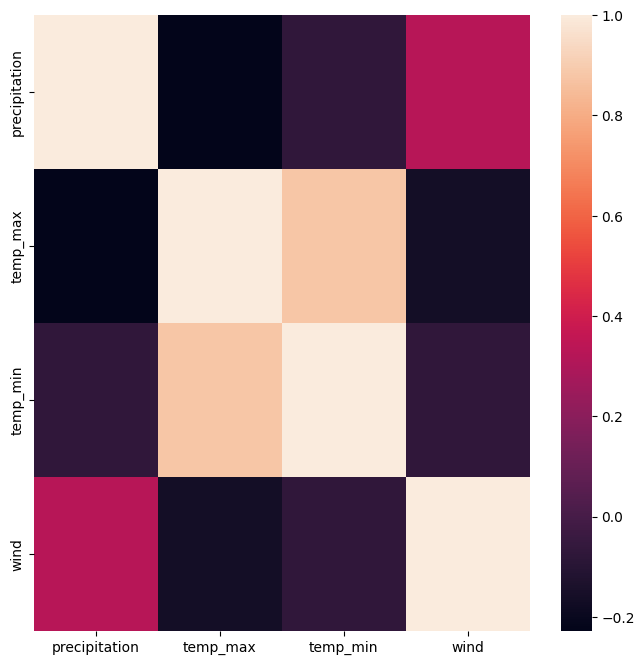

In [44]:
#plot the Correlation distribution
plt.figure(figsize=(8,8))
sns.heatmap (Df.corr ())

<Axes: xlabel='weather'>

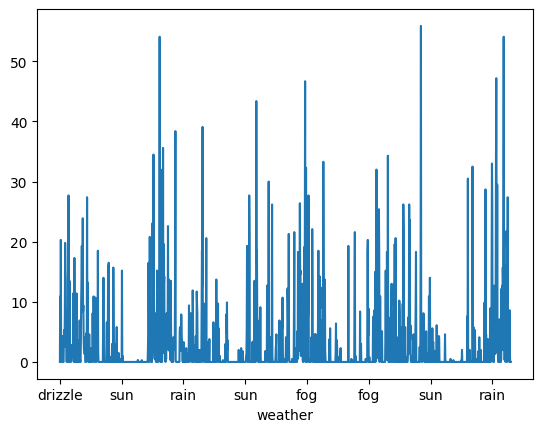

In [45]:
Df.precipitation.plot()

<ipython-input-46-5d309fedc748>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot  (Df ['precipitation'])


<Axes: xlabel='precipitation', ylabel='Density'>

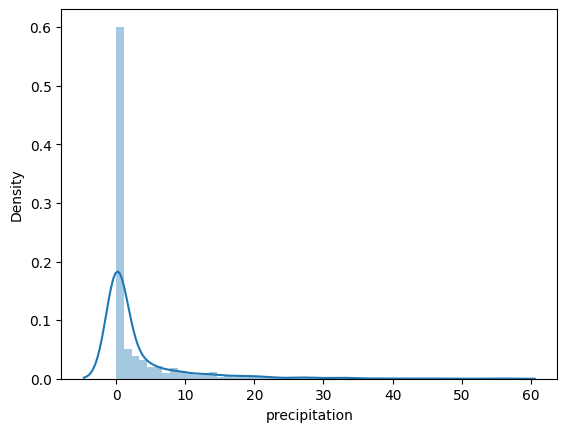

In [46]:
#distribution of precipitation
sns.distplot  (Df ['precipitation'])

<ipython-input-47-3e6aaf4a321c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (Df ['wind'])


<Axes: xlabel='wind', ylabel='Density'>

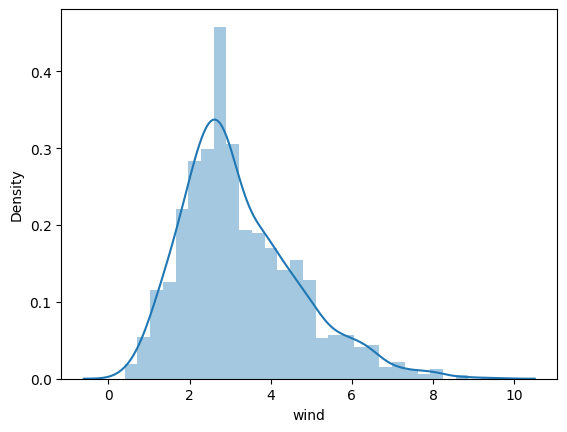

In [47]:
sns.distplot (Df ['wind'])

<ipython-input-48-c7c2d2a78495>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (Df ['temp_max'])


<Axes: xlabel='temp_max', ylabel='Density'>

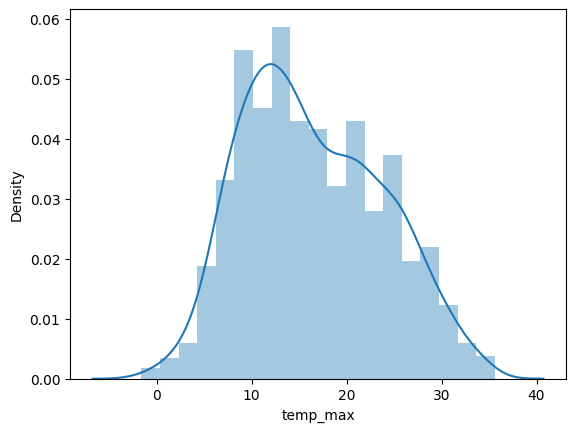

In [48]:
sns.distplot (Df ['temp_max'])

<ipython-input-49-7d52b12e2649>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (Df ['temp_min'])


<Axes: xlabel='temp_min', ylabel='Density'>

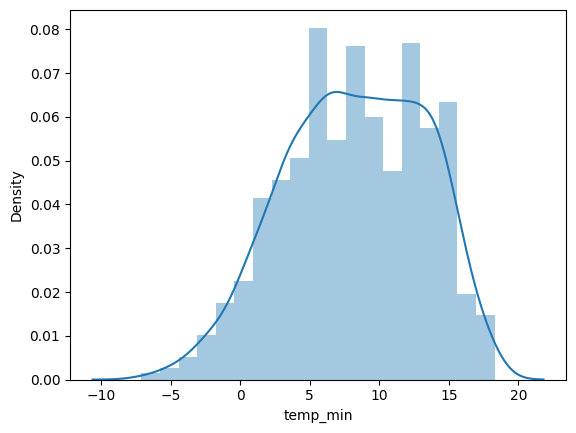

In [49]:
sns.distplot (Df ['temp_min'])

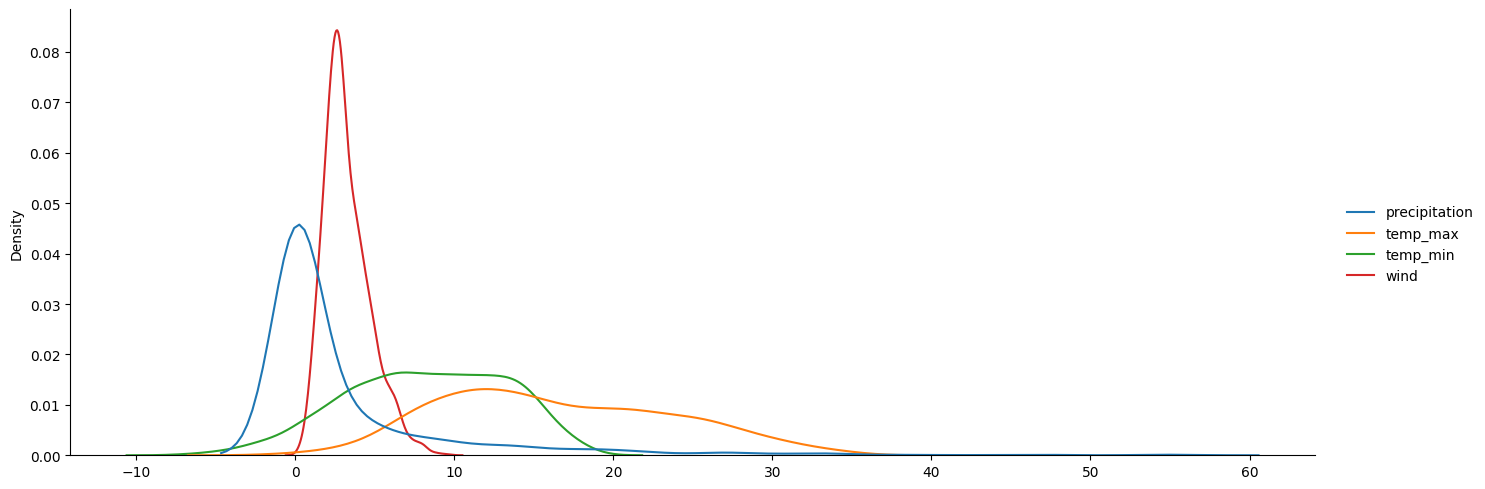

In [51]:
#Distribution plot of all feature of dataset (numerical data)
sns.displot (Df,height=5,kind="kde",aspect=2.7)

Detect Outliers and remove them

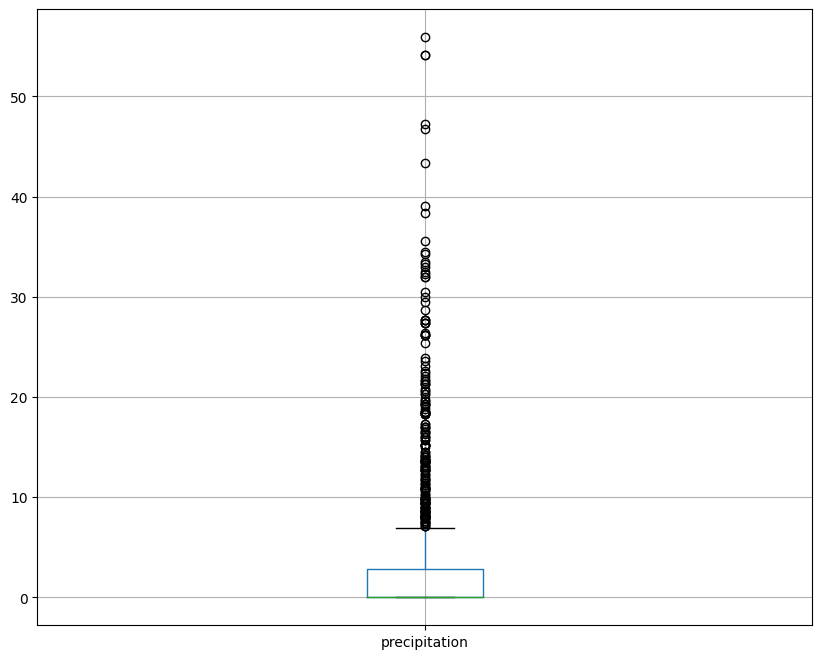

In [53]:
figure=plt.figure (figsize=(10,8))

#box plot to detect outliers
Df.boxplot(column='precipitation')

plt.show()

To detect and remove the outliers use Inter Quartile Range method  (IQR)

In [54]:
Q1=Df.precipitation.quantile(0.25)
Q1

0.0

In [55]:
Median= Df.precipitation.median
Median

<bound method NDFrame._add_numeric_operations.<locals>.median of weather
drizzle     0.0
rain       10.9
rain        0.8
rain       20.3
rain        1.3
           ... 
rain        8.6
rain        1.5
fog         0.0
sun         0.0
sun         0.0
Name: precipitation, Length: 1461, dtype: float64>

In [56]:
Q3=Df.precipitation.quantile(0.75)
Q3

2.8

In [57]:
IQR=Q3-Q1
IQR

2.8

In [58]:
Upperl=Q3+(1.5*IQR)
Lowerl=Q1-(1.5*IQR)
Upperl
Lowerl

-4.199999999999999

Length of dataset after removing outliers

In [89]:
New_df=Df.loc [(Df['precipitation']>Upperl)|(Df ['precipitation']<Lowerl)]
len (New_df)

206

Length of old dataset before removing the outliers

In [60]:
len (Df)

1461

Check the distribution after remove the outliers

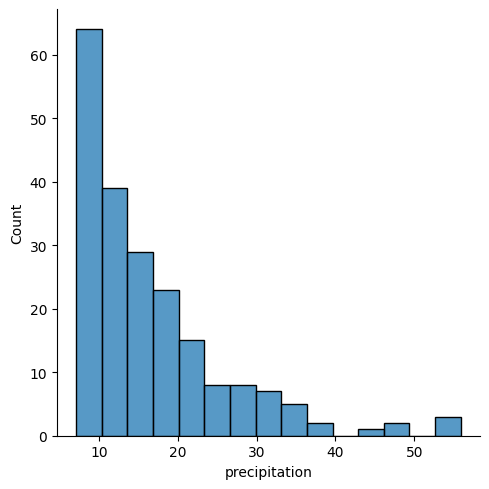

In [61]:
sns.displot(New_df ['precipitation'])

<ipython-input-62-2e25ad451350>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(New_df ['precipitation'])


<Axes: xlabel='precipitation', ylabel='Density'>

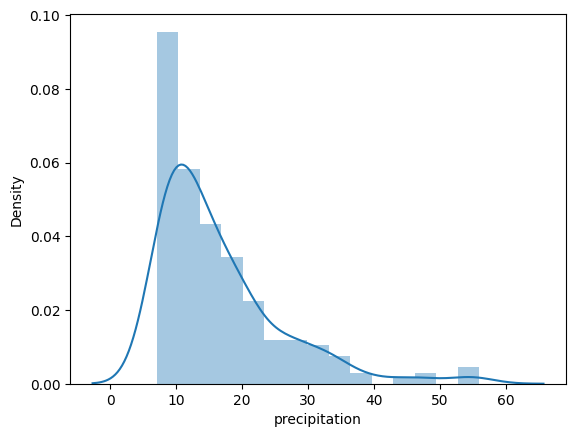

In [62]:
sns.distplot(New_df ['precipitation'])

Now the parameter near to normally distributed

In [63]:
Skewness =skew(New_df ['precipitation'])
Skewness

1.7520793372772143

In [64]:
Kurtosis =kurtosis (New_df  ['precipitation'])
Kurtosis

3.479711111690013

HYPOTHESIS TESTS FOR PARAMETRIC STATISTICS

P values, significance level ,sample size and power

1.Calculating the parametric statistical significance using T-test

In [65]:
from scipy.stats import ttest_ind

D1=New_df ['temp_max']
D2=New_df ['temp_min']

#compare the samples
Stat,p =ttest_ind (D1,D2)
print ('statistics =%.3f,p=%.3f'% (Stat,p))

#interpret

alpha=0.05
if p>alpha:
   print('same distribution  (fail to reject H0)')
else:
    print('different distribution (reject H0)')

statistics =12.920,p=0.000
different distribution (reject H0)


2.Parametric statistical Analysis of Variance

In [66]:
from scipy.stats import f_oneway

D1=New_df ['temp_max']
D2=New_df ['temp_min']

#compare the samples
Stat,p =f_oneway(D1,D2)
print ('statistics =%.3f,p=%.3f'% (Stat,p))

#interpret

alpha=0.05
if p>alpha:
   print('same distribution  (fail to reject H0)')
else:
    print('different distribution (reject H0)')

statistics =166.924,p=0.000
different distribution (reject H0)


To calculate the Effect Size, use Pearson Correlation Significant

In [67]:
from scipy.stats import pearsonr

corr, _ =pearsonr (D1,D2)
print  ('Pearson Correlation :%.3f'%corr)

Pearson Correlation :0.879


Calculate the Sample Size

In [68]:
from statsmodels.stats.power import TTestIndPower

power_analysis =TTestIndPower()
#calculate the samplesize
Sample_size=power_analysis.solve_power (effect_size=0.2,alpha=0.05,power=0.8,alternative ='two-sided')
Sample_size

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


393.4056930002516

In [84]:
New_df.set_index ('date',inplace=True)
New_df

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-02,10.9,10.6,2.8,4.5
2012-01-04,20.3,12.2,5.6,4.7
2012-01-17,8.1,3.3,0.0,5.6
2012-01-18,19.8,0.0,-2.8,5.0
2012-01-19,15.2,-1.1,-2.8,1.6
...,...,...,...,...
2015-12-12,16.0,8.9,5.6,5.6
2015-12-17,21.8,6.7,3.9,6.0
2015-12-18,18.5,8.9,4.4,5.1


In [69]:
New_df.mean ()

<ipython-input-69-137184ed6b9f>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  New_df.mean ()


precipitation    16.532039
temp_max         12.665049
temp_min          7.318447
wind              4.288350
dtype: float64

In [70]:
Std_dev =np.std (New_df)
Std_dev

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3613: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


precipitation    9.414069
temp_max         4.395722
temp_min         3.972961
wind             1.512203
dtype: float64

In [71]:
New_df.count ()

date             206
precipitation    206
temp_max         206
temp_min         206
wind             206
dtype: int64

Calculate the Effect Size using Cohen's d Equation

In [72]:
Mu1=12.66 #gp1 avg value
Mu2=7.31  #gp2 avg value

s1=4.3    #gp1 std_dev
s2=3.9    #gp2 std_dev
n1=206    #gp1 sample size
n2=206    #gp2 sample size

#calculate pooled standard deviation
S=np.sqrt ((n1-1)*s1+(n2-1)*s2/(n1+n2-2))
#calculate cohend effect size
d=(Mu1-Mu2)/S

print  ('Effect size is :',round (d, 2))

Effect size is : 0.18


Calculate the Significance level

In [73]:
power_analysis =TTestIndPower()
#Significance level is the alpha
Alpha=power_analysis.solve_power (effect_size=0.2,ratio=1,alpha=0.05,power=0.8,alternative ='two-sided')
Alpha

/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


393.4056930002516

Exploratory Factor Analysis

In [76]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 40.7 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=64a2222fdb4addf4bd5f75860d8d3f975acf957063d9382f7fda57af03b89b2d
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [77]:
from factor_analyzer import FactorAnalyzer
#pip install factor_analyzer and create factor analyzer

Fa=FactorAnalyzer  (n_factors =4,rotation="varimax")

In [85]:
Fa.fit (New_df)
loadings=Fa.loadings_

In [86]:
#get the loading eigenvalues
ev, v=Fa.get_eigenvalues()

xvals=range (1,New_df.shape [1]+1)

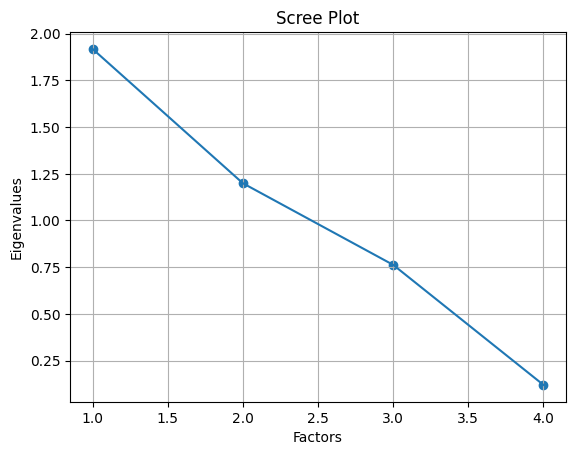

In [87]:
plt.scatter(xvals,ev)
plt.plot (xvals,ev )
plt.xlabel ('Factors')
plt.ylabel  ('Eigenvalues')
plt.title  ('Scree Plot')
plt.grid()
plt.show ()